# Histograms

In [1]:
import os
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def extract_lastLoss(directory):
    # Extract last loss from all the models
    lastLoss_tuples = []
    # Loop through each file in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)       # Construct the full file path
        if os.path.isfile(file_path):       # Check if it is a file
            result_sim = np.load(file_path, allow_pickle=True)
            lastLoss_tuples.extend([(label, array[-1]) for label, array in result_sim if 'loss' in label])

    # Creating df
    return pd.DataFrame(lastLoss_tuples, columns=['label', 'value'])


In [3]:
def models_mindata_n_matrix(df, name_models):
    # Extracting the base label (e.g., 'LabelA', 'LabelB')
    df['label_no_rep'] = df['label'].apply(lambda x: x.split('_rep')[0])
    # Group with the base label and find min
    max_value_s = df.groupby('label_no_rep')['value'].min()

    data_n_matrix_models= []
    for name in name_models:
        model_s = max_value_s[max_value_s.index.str.contains(name)]
        data_n_matrix_models.append([model_s.values])
    return data_n_matrix_models

## N = 4

In [4]:
directory = '20240420_N4_HPC_simulation/'
name_models = ['ClementsBellNxN', 'FldzhyanBellNxN', 'FldzhyanBellHalfNxN', 'NEUROPULSBonus_unitaryNxN', 'NEUROPULSBonus_unitary_2long_NxN',
               'NEUROPULSBonus_anymatrixNxN', 'NEUROPULSBonus_Bell_Minht_NxN', 'NEUROPULSBonus_BellNormal_NxN',
               'CB_withMZI', 'FB_withMZI', 'FBH_withMZI', 'NPBU_withMZI',]

lastLoss_df = extract_lastLoss(directory)
data_n_matrix_models = models_mindata_n_matrix(lastLoss_df, name_models)

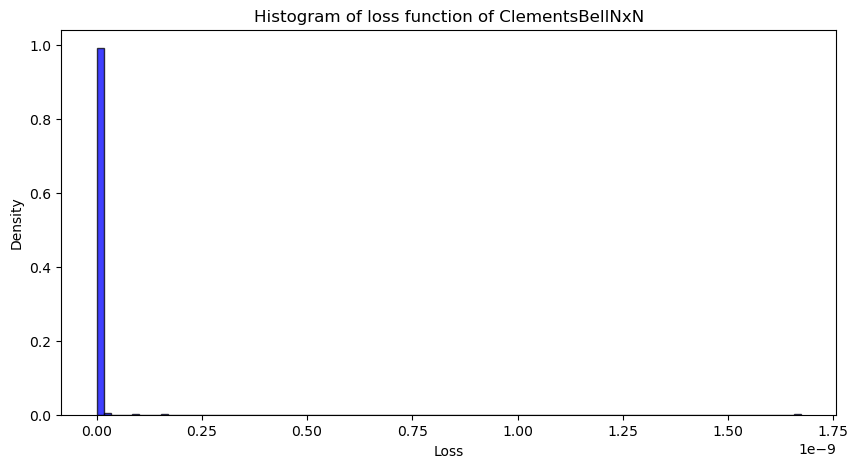

In [5]:
name = 'ClementsBellNxN'
max = np.max(data_n_matrix_models[name_models.index(name)])
bins = np.linspace(0, max, num=100)
counts, bin_edges = np.histogram(data_n_matrix_models[name_models.index(name)], bins=bins)
bin_widths = np.diff(bin_edges)
normalized_counts = counts / counts.sum()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axs.bar(bin_edges[:-1], normalized_counts, width=np.diff(bin_edges), edgecolor='black', align='edge', alpha=0.75, color='blue')
plt.title('Histogram of loss function of '+name)
plt.xlabel('Loss')
plt.ylabel('Density')
# plt.ylim(0, 0.010)
plt.show();

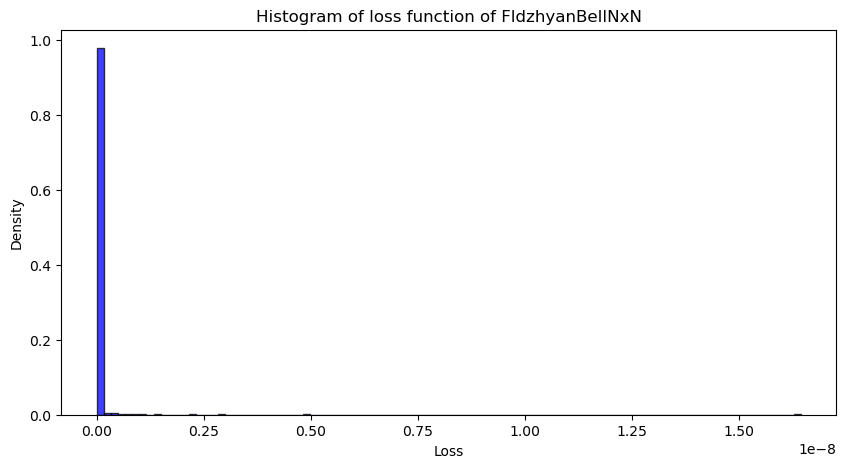

In [6]:
name = 'FldzhyanBellNxN'
max = np.max(data_n_matrix_models[name_models.index(name)])
bins = np.linspace(0, max, num=100)
counts, bin_edges = np.histogram(data_n_matrix_models[name_models.index(name)], bins=bins)
bin_widths = np.diff(bin_edges)
normalized_counts = counts / counts.sum()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axs.bar(bin_edges[:-1], normalized_counts, width=np.diff(bin_edges), edgecolor='black', align='edge', alpha=0.75, color='blue')
plt.title('Histogram of loss function of '+name)
plt.xlabel('Loss')
plt.ylabel('Density')
# plt.ylim(0, 0.010)
plt.show();

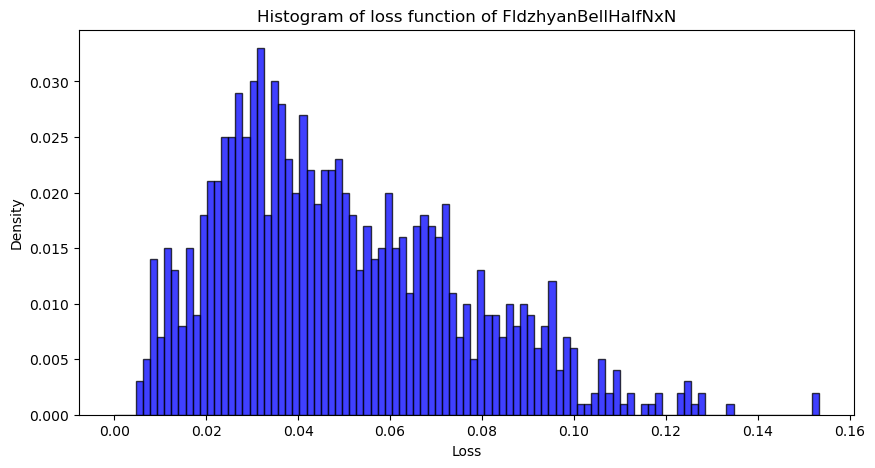

In [7]:
name = 'FldzhyanBellHalfNxN'
max = np.max(data_n_matrix_models[name_models.index(name)])
bins = np.linspace(0, max, num=100)
counts, bin_edges = np.histogram(data_n_matrix_models[name_models.index(name)], bins=bins)
bin_widths = np.diff(bin_edges)
normalized_counts = counts / counts.sum()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axs.bar(bin_edges[:-1], normalized_counts, width=np.diff(bin_edges), edgecolor='black', align='edge', alpha=0.75, color='blue')
plt.title('Histogram of loss function of '+name)
plt.xlabel('Loss')
plt.ylabel('Density')
# plt.ylim(0, 0.010)
plt.show();

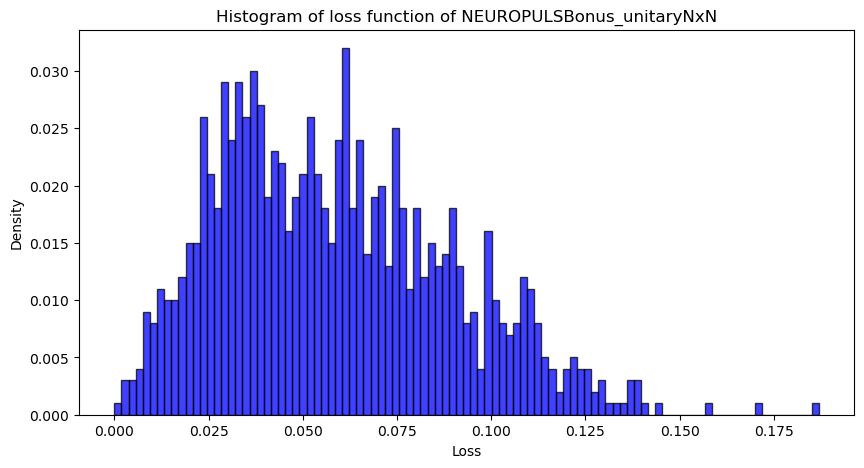

In [8]:
name = 'NEUROPULSBonus_unitaryNxN'
max = np.max(data_n_matrix_models[name_models.index(name)])
bins = np.linspace(0, max, num=100)
counts, bin_edges = np.histogram(data_n_matrix_models[name_models.index(name)], bins=bins)
bin_widths = np.diff(bin_edges)
normalized_counts = counts / counts.sum()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axs.bar(bin_edges[:-1], normalized_counts, width=np.diff(bin_edges), edgecolor='black', align='edge', alpha=0.75, color='blue')
plt.title('Histogram of loss function of '+name)
plt.xlabel('Loss')
plt.ylabel('Density')
# plt.ylim(0, 0.010)
plt.show();

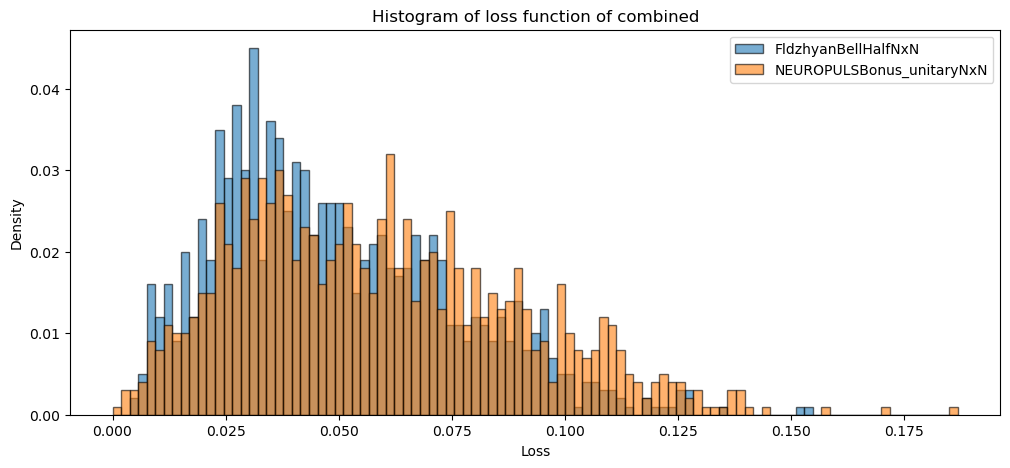

In [9]:
# Compare FldzhyanBellHalfNxN and NEUROPULSBonus_unitaryNxN

name1 = 'FldzhyanBellHalfNxN'
name2 = 'NEUROPULSBonus_unitaryNxN'
max1 = np.max(data_n_matrix_models[name_models.index(name1)])
max2 = np.max(data_n_matrix_models[name_models.index(name2)])
max = max1 if max1>max2 else max2
bins = np.linspace(0, max, num=100)
counts1, bin_edges1 = np.histogram(data_n_matrix_models[name_models.index(name1)], bins=bins)
counts2, bin_edges2 = np.histogram(data_n_matrix_models[name_models.index(name2)], bins=bins)
bin_widths = np.diff(bin_edges1)
normalized_counts1 = counts1 / counts1.sum()
normalized_counts2 = counts2 / counts2.sum()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))
axs.bar(bin_edges1[:-1], normalized_counts1, width=np.diff(bin_edges1), edgecolor='black', align='edge', alpha=0.6, label=name1)
axs.bar(bin_edges2[:-1], normalized_counts2, width=np.diff(bin_edges2), edgecolor='black', align='edge', alpha=0.6, label=name2)
axs.set_title('Side by Side Histogram')
axs.legend()

plt.title('Histogram of loss function of combined')
plt.xlabel('Loss')
plt.ylabel('Density')
# plt.ylim(0, 0.010)
plt.show();

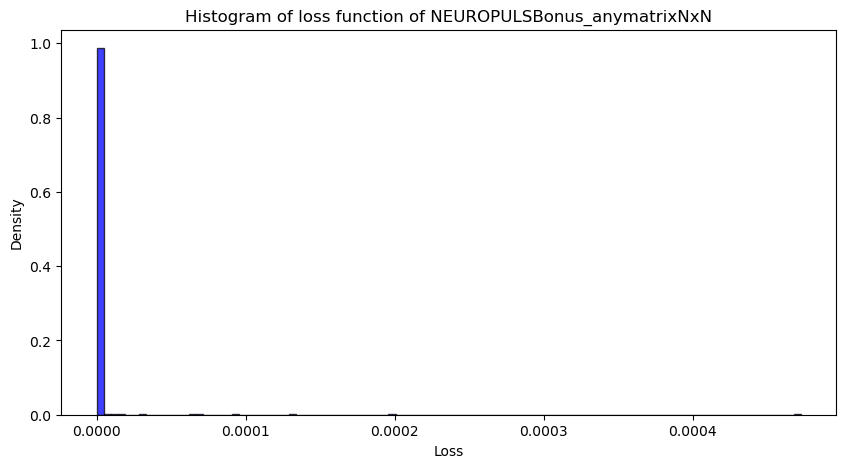

In [10]:
name = 'NEUROPULSBonus_anymatrixNxN'
max = np.max(data_n_matrix_models[name_models.index(name)])
bins = np.linspace(0, max, num=100)
counts, bin_edges = np.histogram(data_n_matrix_models[name_models.index(name)], bins=bins)
bin_widths = np.diff(bin_edges)
normalized_counts = counts / counts.sum()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axs.bar(bin_edges[:-1], normalized_counts, width=np.diff(bin_edges), edgecolor='black', align='edge', alpha=0.75, color='blue')
plt.title('Histogram of loss function of '+name)
plt.xlabel('Loss')
plt.ylabel('Density')
# plt.ylim(0, 0.010)
plt.show();

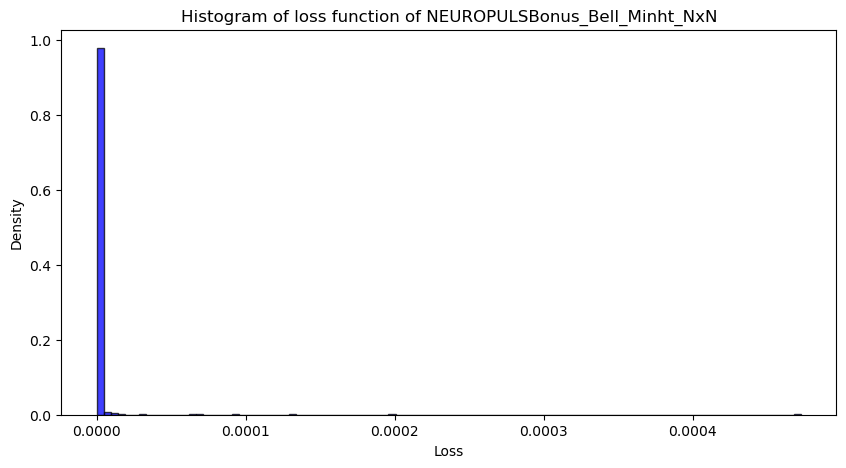

In [11]:
name = 'NEUROPULSBonus_Bell_Minht_NxN'
max = np.max(data_n_matrix_models[name_models.index(name)])
bins = np.linspace(0, max, num=100)
counts, bin_edges = np.histogram(data_n_matrix_models[name_models.index(name)], bins=bins)
bin_widths = np.diff(bin_edges)
normalized_counts = counts / counts.sum()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axs.bar(bin_edges[:-1], normalized_counts, width=np.diff(bin_edges), edgecolor='black', align='edge', alpha=0.75, color='blue')
plt.title('Histogram of loss function of '+name)
plt.xlabel('Loss')
plt.ylabel('Density')
# plt.ylim(0, 0.010)
plt.show();

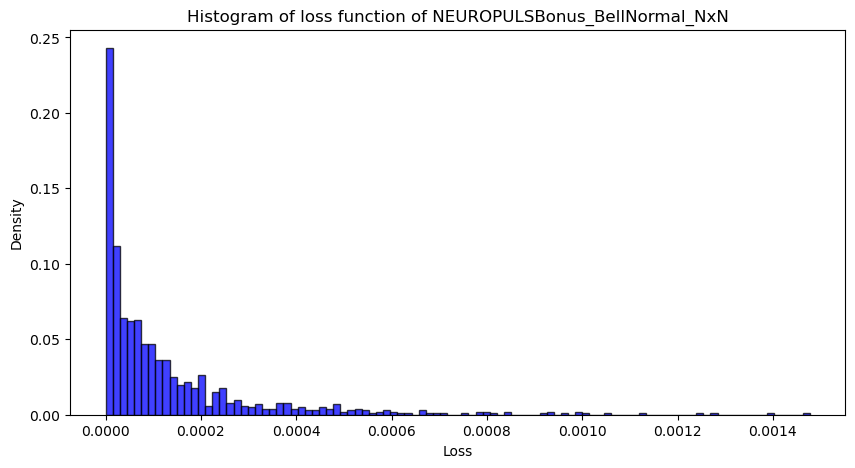

In [12]:
name = 'NEUROPULSBonus_BellNormal_NxN'
max = np.max(data_n_matrix_models[name_models.index(name)])
bins = np.linspace(0, max, num=100)
counts, bin_edges = np.histogram(data_n_matrix_models[name_models.index(name)], bins=bins)
bin_widths = np.diff(bin_edges)
normalized_counts = counts / counts.sum()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axs.bar(bin_edges[:-1], normalized_counts, width=np.diff(bin_edges), edgecolor='black', align='edge', alpha=0.75, color='blue')
plt.title('Histogram of loss function of '+name)
plt.xlabel('Loss')
plt.ylabel('Density')
# plt.ylim(0, 0.010)
plt.show();

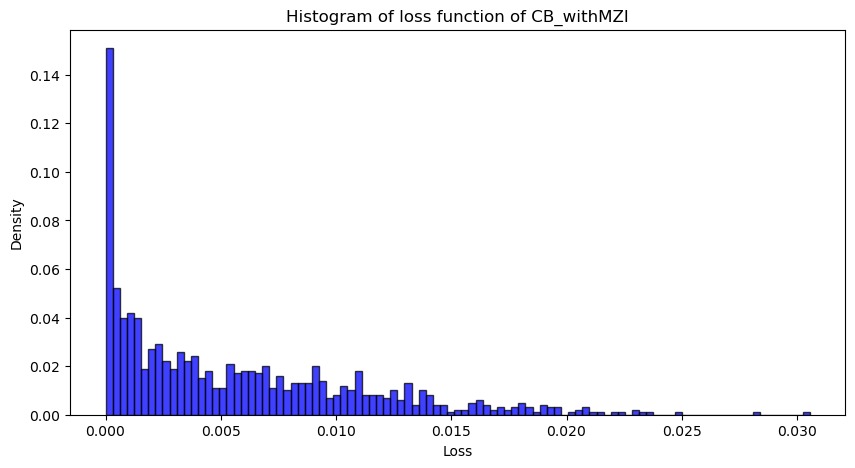

In [13]:
name = 'CB_withMZI'
max = np.max(data_n_matrix_models[name_models.index(name)])
bins = np.linspace(0, max, num=100)
counts, bin_edges = np.histogram(data_n_matrix_models[name_models.index(name)], bins=bins)
bin_widths = np.diff(bin_edges)
normalized_counts = counts / counts.sum()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axs.bar(bin_edges[:-1], normalized_counts, width=np.diff(bin_edges), edgecolor='black', align='edge', alpha=0.75, color='blue')
plt.title('Histogram of loss function of '+name)
plt.xlabel('Loss')
plt.ylabel('Density')
# plt.ylim(0, 0.010)
plt.show();

## N = 8

In [14]:
directory = '20240420_N8_HPC_simulation/'
name_models = ['ClementsBellNxN', 'FldzhyanBellNxN', 'FldzhyanBellHalfNxN', 'NEUROPULSBonus_unitaryNxN', 'NEUROPULSBonus_unitary_2long_NxN',
               'NEUROPULSBonus_anymatrixNxN', 'NEUROPULSBonus_Bell_Minht_NxN', 'NEUROPULSBonus_BellNormal_NxN',
               'CB_withMZI', 'FB_withMZI', 'FBH_withMZI', 'NPBU_withMZI',]

lastLoss_df = extract_lastLoss(directory)
data_n_matrix_models = models_mindata_n_matrix(lastLoss_df, name_models)

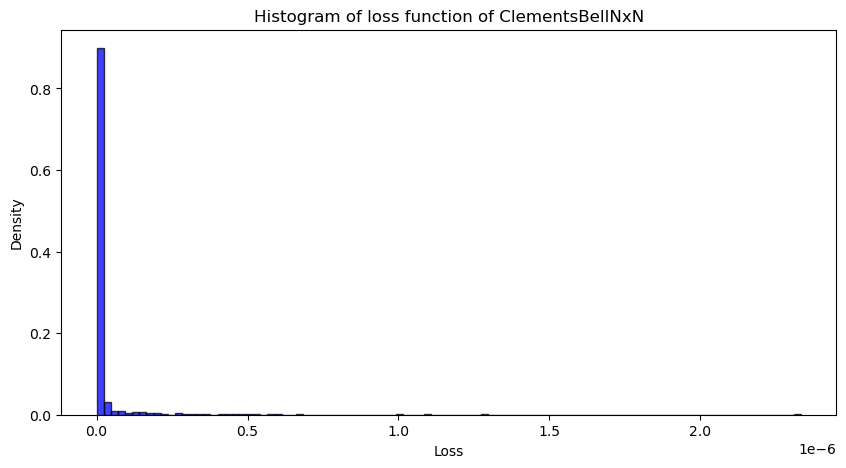

In [15]:
name = 'ClementsBellNxN'
max = np.max(data_n_matrix_models[name_models.index(name)])
bins = np.linspace(0, max, num=100)
counts, bin_edges = np.histogram(data_n_matrix_models[name_models.index(name)], bins=bins)
bin_widths = np.diff(bin_edges)
normalized_counts = counts / counts.sum()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axs.bar(bin_edges[:-1], normalized_counts, width=np.diff(bin_edges), edgecolor='black', align='edge', alpha=0.75, color='blue')
plt.title('Histogram of loss function of '+name)
plt.xlabel('Loss')
plt.ylabel('Density')
# plt.ylim(0, 0.010)
plt.show();

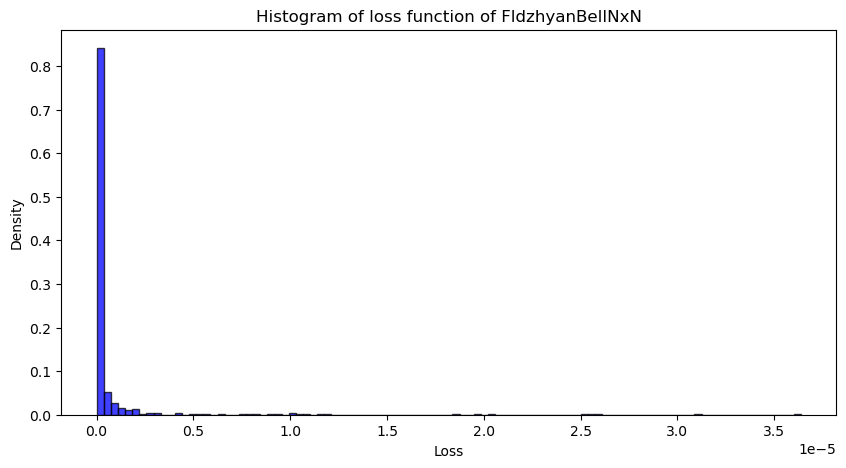

In [16]:
name = 'FldzhyanBellNxN'
max = np.max(data_n_matrix_models[name_models.index(name)])
bins = np.linspace(0, max, num=100)
counts, bin_edges = np.histogram(data_n_matrix_models[name_models.index(name)], bins=bins)
bin_widths = np.diff(bin_edges)
normalized_counts = counts / counts.sum()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axs.bar(bin_edges[:-1], normalized_counts, width=np.diff(bin_edges), edgecolor='black', align='edge', alpha=0.75, color='blue')
plt.title('Histogram of loss function of '+name)
plt.xlabel('Loss')
plt.ylabel('Density')
# plt.ylim(0, 0.010)
plt.show();

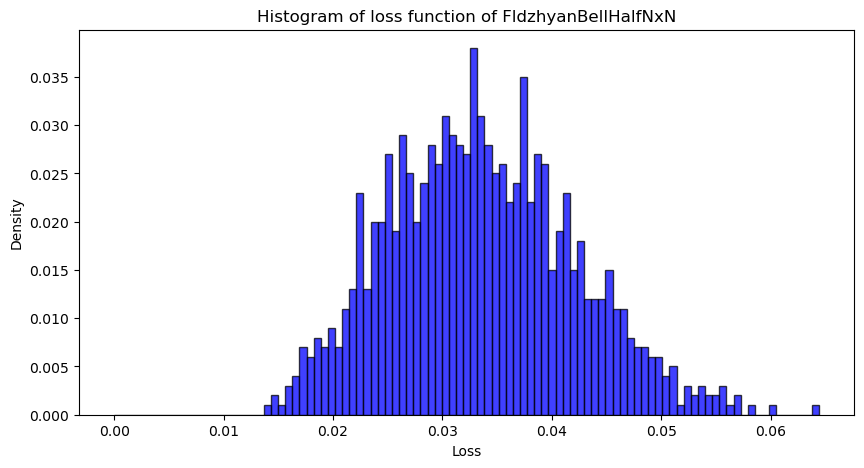

In [17]:
name = 'FldzhyanBellHalfNxN'
max = np.max(data_n_matrix_models[name_models.index(name)])
bins = np.linspace(0, max, num=100)
counts, bin_edges = np.histogram(data_n_matrix_models[name_models.index(name)], bins=bins)
bin_widths = np.diff(bin_edges)
normalized_counts = counts / counts.sum()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axs.bar(bin_edges[:-1], normalized_counts, width=np.diff(bin_edges), edgecolor='black', align='edge', alpha=0.75, color='blue')
plt.title('Histogram of loss function of '+name)
plt.xlabel('Loss')
plt.ylabel('Density')
# plt.ylim(0, 0.010)
plt.show();

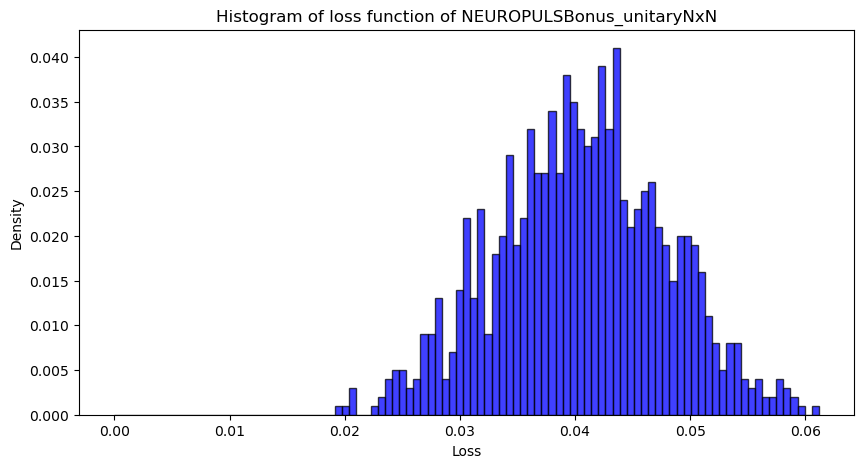

In [18]:
name = 'NEUROPULSBonus_unitaryNxN'
max = np.max(data_n_matrix_models[name_models.index(name)])
bins = np.linspace(0, max, num=100)
counts, bin_edges = np.histogram(data_n_matrix_models[name_models.index(name)], bins=bins)
bin_widths = np.diff(bin_edges)
normalized_counts = counts / counts.sum()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axs.bar(bin_edges[:-1], normalized_counts, width=np.diff(bin_edges), edgecolor='black', align='edge', alpha=0.75, color='blue')
plt.title('Histogram of loss function of '+name)
plt.xlabel('Loss')
plt.ylabel('Density')
# plt.ylim(0, 0.010)
plt.show();

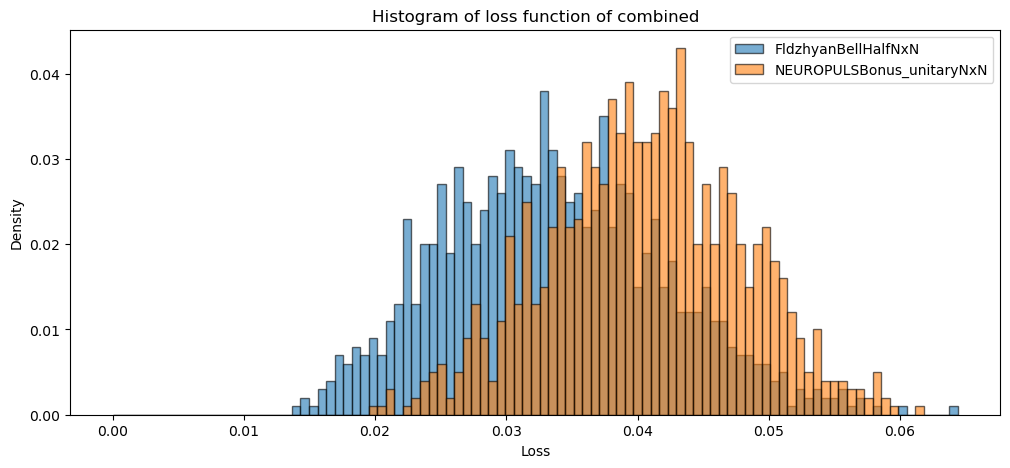

In [19]:
# Compare FldzhyanBellHalfNxN and NEUROPULSBonus_unitaryNxN

name1 = 'FldzhyanBellHalfNxN'
name2 = 'NEUROPULSBonus_unitaryNxN'
max1 = np.max(data_n_matrix_models[name_models.index(name1)])
max2 = np.max(data_n_matrix_models[name_models.index(name2)])
max = max1 if max1>max2 else max2
bins = np.linspace(0, max, num=100)
counts1, bin_edges1 = np.histogram(data_n_matrix_models[name_models.index(name1)], bins=bins)
counts2, bin_edges2 = np.histogram(data_n_matrix_models[name_models.index(name2)], bins=bins)
bin_widths = np.diff(bin_edges1)
normalized_counts1 = counts1 / counts1.sum()
normalized_counts2 = counts2 / counts2.sum()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))
axs.bar(bin_edges1[:-1], normalized_counts1, width=np.diff(bin_edges1), edgecolor='black', align='edge', alpha=0.6, label=name1)
axs.bar(bin_edges2[:-1], normalized_counts2, width=np.diff(bin_edges2), edgecolor='black', align='edge', alpha=0.6, label=name2)
axs.set_title('Side by Side Histogram')
axs.legend()

plt.title('Histogram of loss function of combined')
plt.xlabel('Loss')
plt.ylabel('Density')
# plt.ylim(0, 0.010)
plt.show();

## N = 16

In [20]:
directory = '20240420_N16_HPC_simulation/'
name_models = ['ClementsBellNxN', 'FldzhyanBellNxN', 'FldzhyanBellHalfNxN', 'NEUROPULSBonus_unitaryNxN', 'NEUROPULSBonus_unitary_2long_NxN',
               'NEUROPULSBonus_anymatrixNxN', 'NEUROPULSBonus_Bell_Minht_NxN', 'NEUROPULSBonus_BellNormal_NxN',
               'CB_withMZI', 'FB_withMZI', 'FBH_withMZI', 'NPBU_withMZI',]

lastLoss_df = extract_lastLoss(directory)
data_n_matrix_models = models_mindata_n_matrix(lastLoss_df, name_models)

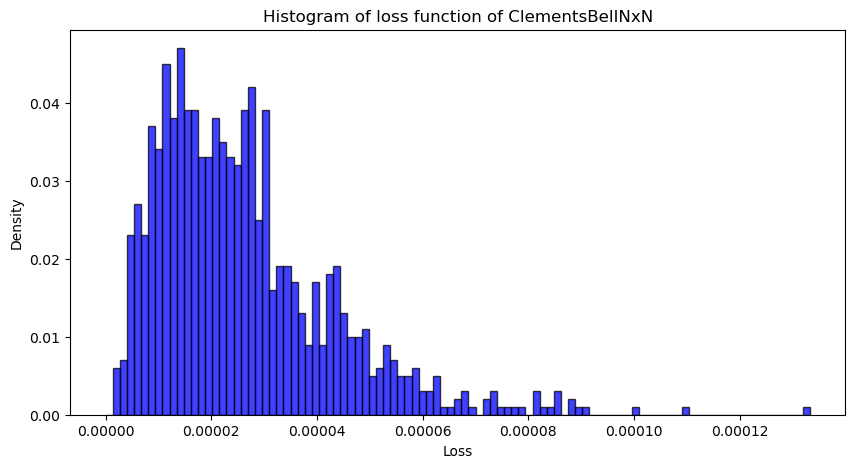

In [21]:
name = 'ClementsBellNxN'
max = np.max(data_n_matrix_models[name_models.index(name)])
bins = np.linspace(0, max, num=100)
counts, bin_edges = np.histogram(data_n_matrix_models[name_models.index(name)], bins=bins)
bin_widths = np.diff(bin_edges)
normalized_counts = counts / counts.sum()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axs.bar(bin_edges[:-1], normalized_counts, width=np.diff(bin_edges), edgecolor='black', align='edge', alpha=0.75, color='blue')
plt.title('Histogram of loss function of '+name)
plt.xlabel('Loss')
plt.ylabel('Density')
# plt.ylim(0, 0.010)
plt.show();

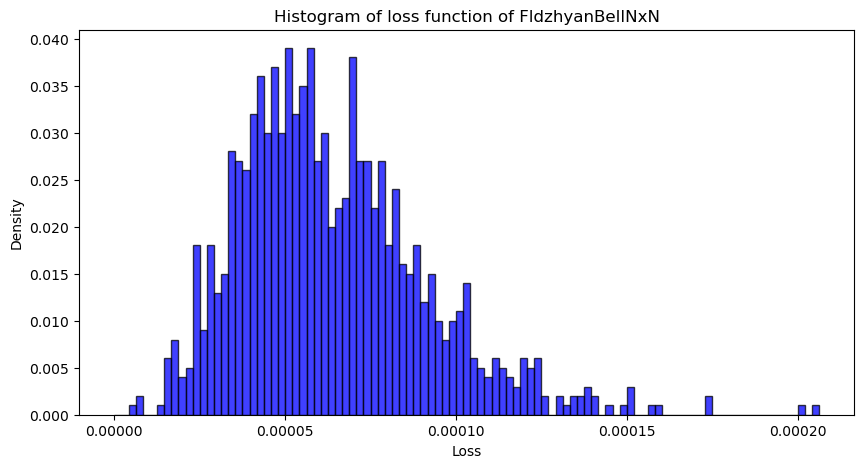

In [22]:
name = 'FldzhyanBellNxN'
max = np.max(data_n_matrix_models[name_models.index(name)])
bins = np.linspace(0, max, num=100)
counts, bin_edges = np.histogram(data_n_matrix_models[name_models.index(name)], bins=bins)
bin_widths = np.diff(bin_edges)
normalized_counts = counts / counts.sum()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axs.bar(bin_edges[:-1], normalized_counts, width=np.diff(bin_edges), edgecolor='black', align='edge', alpha=0.75, color='blue')
plt.title('Histogram of loss function of '+name)
plt.xlabel('Loss')
plt.ylabel('Density')
# plt.ylim(0, 0.010)
plt.show();

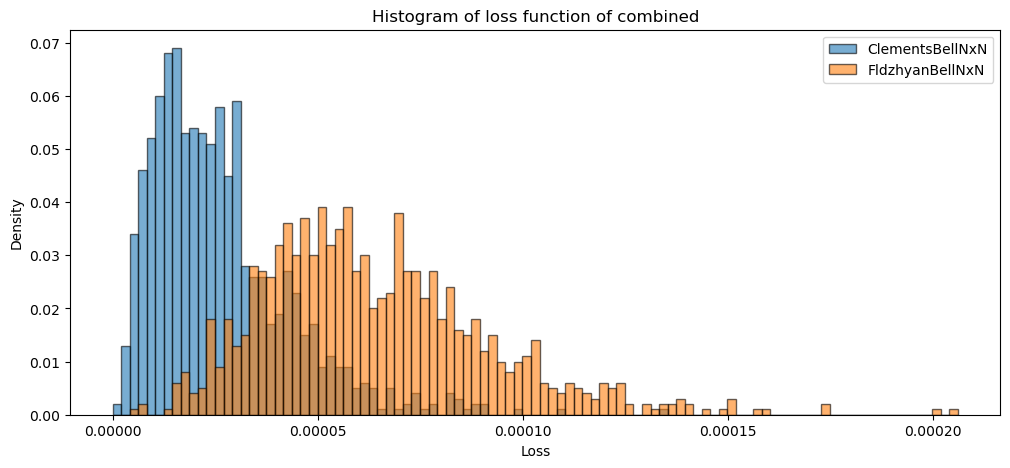

In [23]:
# Compare
name1 = 'ClementsBellNxN'
name2 = 'FldzhyanBellNxN'

max1 = np.max(data_n_matrix_models[name_models.index(name1)])
max2 = np.max(data_n_matrix_models[name_models.index(name2)])
max = max1 if max1>max2 else max2
bins = np.linspace(0, max, num=100)
counts1, bin_edges1 = np.histogram(data_n_matrix_models[name_models.index(name1)], bins=bins)
counts2, bin_edges2 = np.histogram(data_n_matrix_models[name_models.index(name2)], bins=bins)
bin_widths = np.diff(bin_edges1)
normalized_counts1 = counts1 / counts1.sum()
normalized_counts2 = counts2 / counts2.sum()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))
axs.bar(bin_edges1[:-1], normalized_counts1, width=np.diff(bin_edges1), edgecolor='black', align='edge', alpha=0.6, label=name1)
axs.bar(bin_edges2[:-1], normalized_counts2, width=np.diff(bin_edges2), edgecolor='black', align='edge', alpha=0.6, label=name2)
axs.set_title('Side by Side Histogram')
axs.legend()

plt.title('Histogram of loss function of combined')
plt.xlabel('Loss')
plt.ylabel('Density')
# plt.ylim(0, 0.010)
plt.show();

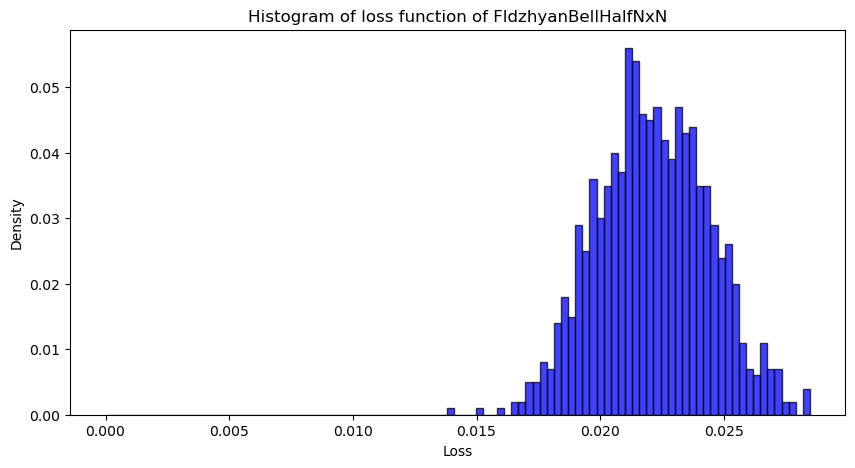

In [24]:
name = 'FldzhyanBellHalfNxN'
max = np.max(data_n_matrix_models[name_models.index(name)])
bins = np.linspace(0, max, num=100)
counts, bin_edges = np.histogram(data_n_matrix_models[name_models.index(name)], bins=bins)
bin_widths = np.diff(bin_edges)
normalized_counts = counts / counts.sum()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axs.bar(bin_edges[:-1], normalized_counts, width=np.diff(bin_edges), edgecolor='black', align='edge', alpha=0.75, color='blue')
plt.title('Histogram of loss function of '+name)
plt.xlabel('Loss')
plt.ylabel('Density')
# plt.ylim(0, 0.010)
plt.show();

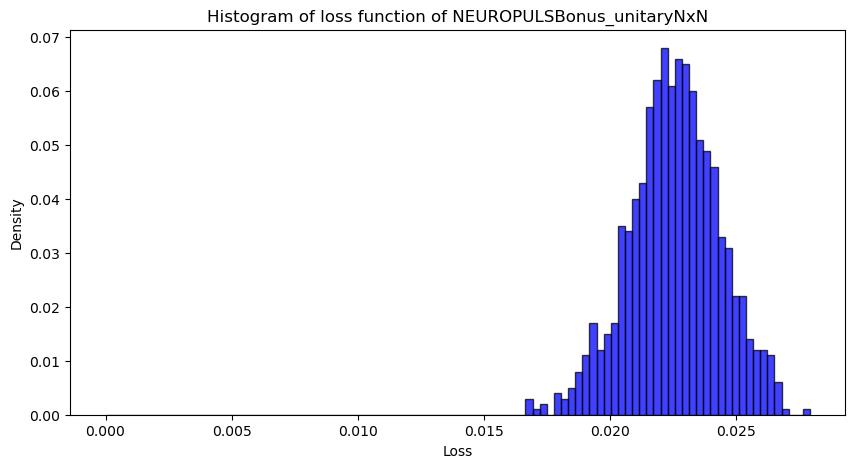

In [25]:
name = 'NEUROPULSBonus_unitaryNxN'
max = np.max(data_n_matrix_models[name_models.index(name)])
bins = np.linspace(0, max, num=100)
counts, bin_edges = np.histogram(data_n_matrix_models[name_models.index(name)], bins=bins)
bin_widths = np.diff(bin_edges)
normalized_counts = counts / counts.sum()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axs.bar(bin_edges[:-1], normalized_counts, width=np.diff(bin_edges), edgecolor='black', align='edge', alpha=0.75, color='blue')
plt.title('Histogram of loss function of '+name)
plt.xlabel('Loss')
plt.ylabel('Density')
# plt.ylim(0, 0.010)
plt.show();

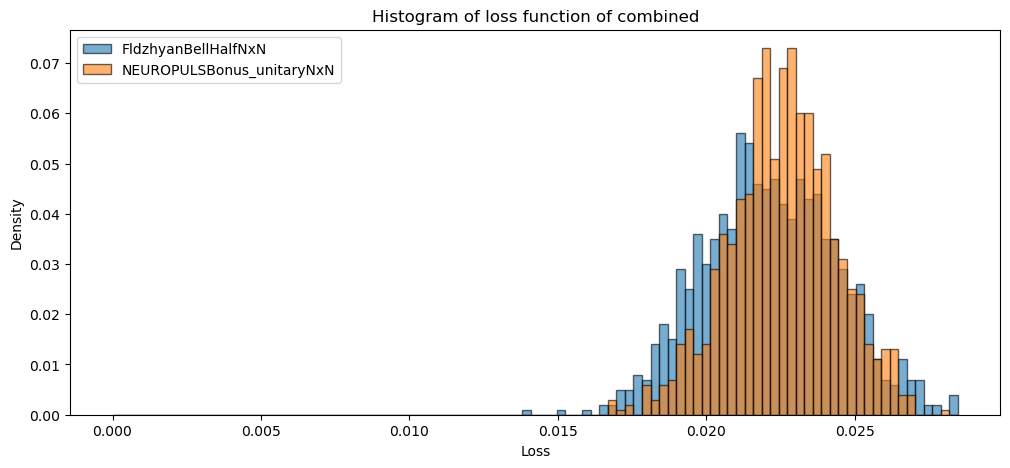

In [26]:
# Compare FldzhyanBellHalfNxN and NEUROPULSBonus_unitaryNxN

name1 = 'FldzhyanBellHalfNxN'
name2 = 'NEUROPULSBonus_unitaryNxN'
max1 = np.max(data_n_matrix_models[name_models.index(name1)])
max2 = np.max(data_n_matrix_models[name_models.index(name2)])
max = max1 if max1>max2 else max2
bins = np.linspace(0, max, num=100)
counts1, bin_edges1 = np.histogram(data_n_matrix_models[name_models.index(name1)], bins=bins)
counts2, bin_edges2 = np.histogram(data_n_matrix_models[name_models.index(name2)], bins=bins)
bin_widths = np.diff(bin_edges1)
normalized_counts1 = counts1 / counts1.sum()
normalized_counts2 = counts2 / counts2.sum()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))
axs.bar(bin_edges1[:-1], normalized_counts1, width=np.diff(bin_edges1), edgecolor='black', align='edge', alpha=0.6, label=name1)
axs.bar(bin_edges2[:-1], normalized_counts2, width=np.diff(bin_edges2), edgecolor='black', align='edge', alpha=0.6, label=name2)
axs.set_title('Side by Side Histogram')
axs.legend()

plt.title('Histogram of loss function of combined')
plt.xlabel('Loss')
plt.ylabel('Density')
# plt.ylim(0, 0.010)
plt.show();

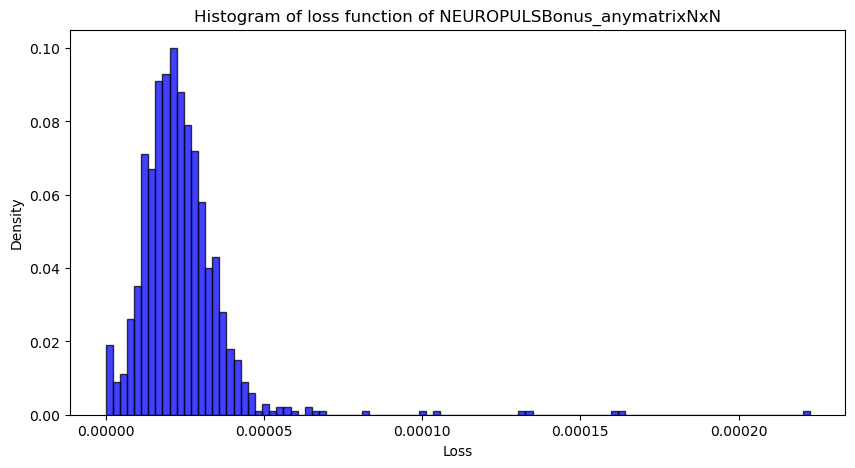

In [27]:
name = 'NEUROPULSBonus_anymatrixNxN'
max = np.max(data_n_matrix_models[name_models.index(name)])
bins = np.linspace(0, max, num=100)
counts, bin_edges = np.histogram(data_n_matrix_models[name_models.index(name)], bins=bins)
bin_widths = np.diff(bin_edges)
normalized_counts = counts / counts.sum()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axs.bar(bin_edges[:-1], normalized_counts, width=np.diff(bin_edges), edgecolor='black', align='edge', alpha=0.75, color='blue')
plt.title('Histogram of loss function of '+name)
plt.xlabel('Loss')
plt.ylabel('Density')
# plt.ylim(0, 0.010)
plt.show();

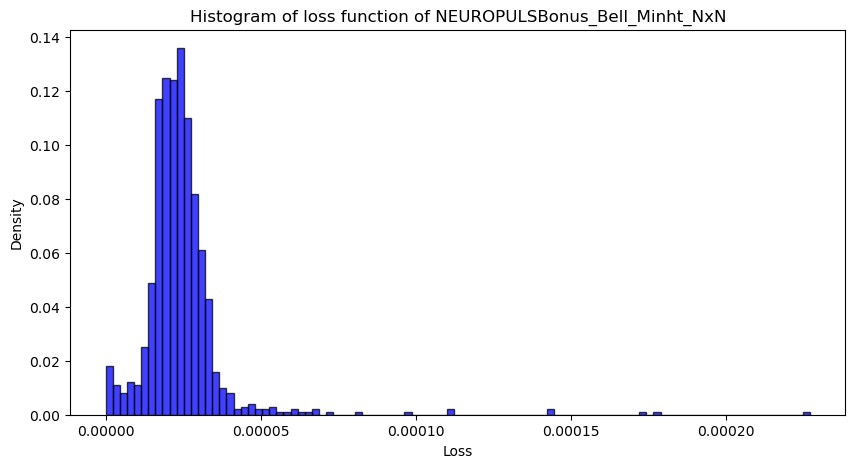

In [28]:
name = 'NEUROPULSBonus_Bell_Minht_NxN'
max = np.max(data_n_matrix_models[name_models.index(name)])
bins = np.linspace(0, max, num=100)
counts, bin_edges = np.histogram(data_n_matrix_models[name_models.index(name)], bins=bins)
bin_widths = np.diff(bin_edges)
normalized_counts = counts / counts.sum()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axs.bar(bin_edges[:-1], normalized_counts, width=np.diff(bin_edges), edgecolor='black', align='edge', alpha=0.75, color='blue')
plt.title('Histogram of loss function of '+name)
plt.xlabel('Loss')
plt.ylabel('Density')
# plt.ylim(0, 0.010)
plt.show();

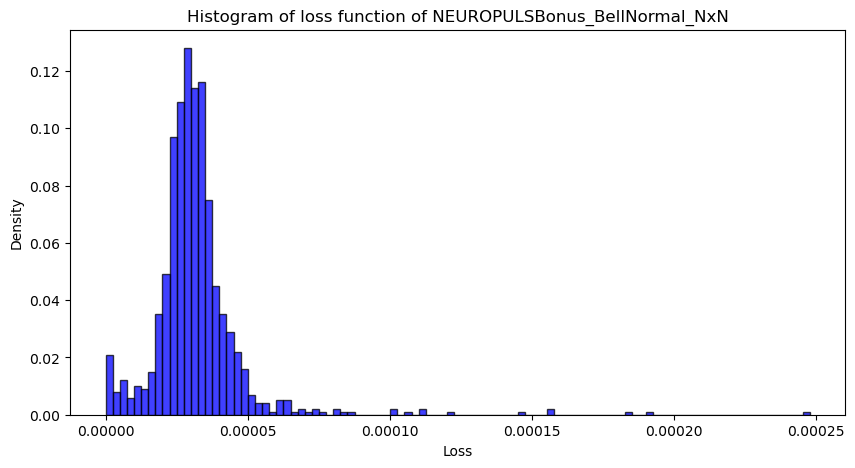

In [29]:
name = 'NEUROPULSBonus_BellNormal_NxN'
max = np.max(data_n_matrix_models[name_models.index(name)])
bins = np.linspace(0, max, num=100)
counts, bin_edges = np.histogram(data_n_matrix_models[name_models.index(name)], bins=bins)
bin_widths = np.diff(bin_edges)
normalized_counts = counts / counts.sum()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axs.bar(bin_edges[:-1], normalized_counts, width=np.diff(bin_edges), edgecolor='black', align='edge', alpha=0.75, color='blue')
plt.title('Histogram of loss function of '+name)
plt.xlabel('Loss')
plt.ylabel('Density')
# plt.ylim(0, 0.010)
plt.show();

# MAKE SENSE TO MAKE ALSO FOR FIDELITY? YES but not make all shit